# 同花顺概念行业板块EDA

In [1]:
import pandas as pd
import numpy as np
#可视化：matplotlib、seaborn、plotly_express
import matplotlib.pyplot as plt
import seaborn as sns
#正确显示中文和负号
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style({'font.sans-serif':['Arial Unicode MS', 'Arial']}) # use sns default theme and set font for Chinese
#这里的pyecharts使用的是0.5.11版本
# from pyecharts.charts import Bar,HeatMap
import plotly.express as px
#导入时间处理模块
from dateutil.parser import parse
from datetime import datetime,timedelta
import time
#pandas赋值老提升警告
# import warnings
# warnings.filterwarnings('ignore')
#使用tushare pro获取数据，需要到官网注册获取相应的token
import tushare as ts 
token='829a1fbce8eb0e34f05ab19906d0e08227c6f64261a81272aa078ccd'
pro=ts.pro_api(token)

In [2]:
# 获取同花顺概念和行业列表
index_list = pro.ths_index()
# 查看数据前几行
index_list.head()

,ts_code,name,count,exchange,list_date,type
0,864006.TI,固态电池,3.0,A,20200102,N
1,864007.TI,太阳能,16.0,A,20200102,N
2,864008.TI,激光雷达,3.0,A,20200102,N
3,864009.TI,CAR-T,12.0,A,20200102,N
4,864010.TI,NFT,18.0,A,20200102,N


In [3]:
pro.ths_index(ts_code='885866.TI')

,ts_code,name,count,exchange,list_date,type
0,885866.TI,数字货币,57,A,20190918,N


In [4]:
df = index_list.groupby('exchange')['name'].count()
df_1 = df.reset_index()
df_1

,exchange,name
0,A,953
1,HK,589
2,US,644


Text(0.5, 1.0, '同花顺概念和行业指数\n A股/HK/US')

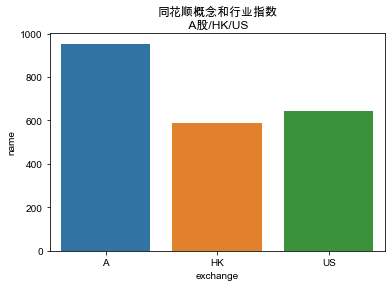

In [5]:
ax = sns.barplot(x='exchange',y='name',data=df_1)
ax.set_title('同花顺概念和行业指数\n A股/HK/US') # 同花顺概念和行业指数

In [6]:
px.bar(df_1,x='exchange',y='name', title='同花顺概念和行业指数\nA股/HK/US', color='exchange')

In [7]:
# we will focus on A market
A_index_list = index_list[index_list['exchange']=='A']
A_index_list # N为板块指数，I为行业指数

,ts_code,name,count,exchange,list_date,type
0,864006.TI,固态电池,3.0,A,20200102,N
1,864007.TI,太阳能,16.0,A,20200102,N
2,864008.TI,激光雷达,3.0,A,20200102,N
3,864009.TI,CAR-T,12.0,A,20200102,N
4,864010.TI,NFT,18.0,A,20200102,N
...,...,...,...,...,...,...
2181,884270.TI,综合环境治理,24.0,A,20210730,I
2182,884271.TI,个护用品,13.0,A,20210730,I
2183,884272.TI,化妆品,13.0,A,20210730,I
2184,884273.TI,医疗美容,3.0,A,20210730,I


In [8]:
A_index_list.info() # there are some values are NA in count

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 2185
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts_code    953 non-null    object 
 1   name       953 non-null    object 
 2   count      947 non-null    float64
 3   exchange   953 non-null    object 
 4   list_date  953 non-null    object 
 5   type       953 non-null    object 
dtypes: float64(1), object(5)
memory usage: 52.1+ KB


In [9]:
A_index_list2 = A_index_list.dropna() # drop NA values
A_index_list2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 2185
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts_code    947 non-null    object 
 1   name       947 non-null    object 
 2   count      947 non-null    float64
 3   exchange   947 non-null    object 
 4   list_date  947 non-null    object 
 5   type       947 non-null    object 
dtypes: float64(1), object(5)
memory usage: 51.8+ KB


In [10]:
A_index_list2['count'].describe()

count     947.000000
mean       52.959873
std       110.860532
min         1.000000
25%        12.000000
50%        26.000000
75%        51.000000
max      2273.000000
Name: count, dtype: float64

可以看到每个概念（行业）中大概有53只个股，但是一只个股可能属于多个概念和行业，我们需要剔除重复的个股，同时，如果一个概念或者行业含有太多或者太少个股，相当于涵盖面太大或者太低，分析起来意义不大。下面我们剔除重复项和成分个股少于10或者大于60的概念或者行业（参考25%和75%分为数）。

In [11]:
A_index_list3 = A_index_list2.drop_duplicates(subset='ts_code', keep='first')
A_index_listF = A_index_list3.query("type=='N'").query('10<count<60')
A_index_listF

,ts_code,name,count,exchange,list_date,type
1,864007.TI,太阳能,16.0,A,20200102,N
3,864009.TI,CAR-T,12.0,A,20200102,N
4,864010.TI,NFT,18.0,A,20200102,N
7,864013.TI,WSB概念,14.0,A,20200102,N
11,864017.TI,太空旅行,13.0,A,20200102,N
...,...,...,...,...,...,...
639,885962.TI,土壤修复,58.0,A,20220218,N
640,885963.TI,智慧灯杆,20.0,A,20220221,N
641,885964.TI,俄乌冲突概念,51.0,A,20220225,N
642,885965.TI,中俄贸易概念,12.0,A,20220228,N


In [12]:
A_index_listF = A_index_listF[-A_index_listF['name'].apply(lambda s: s.endswith('样本股') or s.endswith('成分股'))] # 剔除样本股和成分股指数
A_index_listF.sort_values('count')

,ts_code,name,count,exchange,list_date,type
415,885591.TI,中韩自贸区,11.0,A,20140714,N
373,885487.TI,天津自贸区,11.0,A,20131010,N
465,885747.TI,共享单车,11.0,A,20170623,N
557,885877.TI,转基因,11.0,A,20200106,N
489,885780.TI,啤酒概念,11.0,A,20180108,N
...,...,...,...,...,...,...
629,885952.TI,幽门螺杆菌概念,57.0,A,20220106,N
597,885920.TI,光伏建筑一体化,57.0,A,20210309,N
548,885866.TI,数字货币,57.0,A,20190918,N
639,885962.TI,土壤修复,58.0,A,20220218,N


In [13]:
fig = px.bar(A_index_listF.sort_values('count'), x='name', y='count', color='name')
fig.update_layout(xaxis_tickangle=45)

In [14]:
# get daily THS concept data
ct = datetime.today() # current time
print(ct)
# ct = datetime.strptime(ct.strftime('%Y%m%d'), '%Y%m%d')
# print(ct)
num_days = 10 # 取多少日数据, 我们只需要算1，3，5日收益率，10天够了
pt = ct - timedelta(num_days) # num_days days before
ct = ct.strftime('%Y%m%d')
pt = pt.strftime('%Y%m%d')
print(f'current date is {ct}, previous date is {pt}')

2022-03-04 21:14:27.936758
current date is 20220304, previous date is 20220222


In [15]:
df = pd.DataFrame() # empty dataframe
cnt = 0
miss_code = []
for code in A_index_listF['ts_code']:
    print(f'TS code is {code}')
    if cnt != 0 and cnt % 5 == 0:
        print('beyond 5 times sleep 1 min')
        miss_code.append(code)
        time.sleep(60)
        cnt +=1
    else:
        df_tmp = pro.ths_daily(ts_code=code, start_date=pt, fields='ts_code,trade_date,open,close,high,low,pct_change')
        df = pd.concat([df,df_tmp], ignore_index=True)
        # print(df,df_tmp)
        cnt += 1
        print(f'count = {cnt}')

TS code is 864007.TI
count = 1
TS code is 864009.TI
count = 2
TS code is 864010.TI
count = 3
TS code is 864013.TI
count = 4
TS code is 864017.TI
count = 5
TS code is 864020.TI
beyond 5 times sleep 1 min
TS code is 864022.TI
count = 7
TS code is 864026.TI
count = 8
TS code is 864027.TI
count = 9
TS code is 864028.TI
count = 10
TS code is 885284.TI
beyond 5 times sleep 1 min
TS code is 885343.TI
count = 12
TS code is 885345.TI
count = 13
TS code is 885372.TI
count = 14
TS code is 885402.TI
count = 15
TS code is 885406.TI
beyond 5 times sleep 1 min
TS code is 885426.TI
count = 17
TS code is 885428.TI
count = 18
TS code is 885439.TI
count = 19
TS code is 885462.TI
count = 20
TS code is 885472.TI
beyond 5 times sleep 1 min
TS code is 885487.TI
count = 22
TS code is 885497.TI
count = 23
TS code is 885500.TI
count = 24
TS code is 885505.TI
count = 25
TS code is 885508.TI
beyond 5 times sleep 1 min
TS code is 885514.TI
count = 27
TS code is 885525.TI
count = 28
TS code is 885530.TI
count = 29


In [16]:
time.sleep(60)
cnt = 0
while len(miss_code) > 5:
    miss_code2 = []
    for code in miss_code:
        if cnt != 0 and cnt % 5 == 0:
            print('beyond 5 times sleep 1 min')
            miss_code2.append(code)
            miss_code = miss_code2
            time.sleep(60)
            cnt +=1
        else:
            df_tmp = pro.ths_daily(ts_code=code, start_date=pt, fields='ts_code,trade_date,open,close,high,low,pct_change')
            df = pd.concat([df,df_tmp], ignore_index=True)
            # print(df,df_tmp)
            cnt += 1
            print(f'count = {cnt}')
else:
    print('missing code now less than 5')
    for code in miss_code:
        df_tmp = pro.ths_daily(ts_code=code, start_date=pt, fields='ts_code,trade_date,open,close,high,low,pct_change')
        df = pd.concat([df,df_tmp], ignore_index=True)

count = 1
count = 2
count = 3
count = 4
count = 5
beyond 5 times sleep 1 min
count = 7
count = 8
count = 9
count = 10
beyond 5 times sleep 1 min
count = 12
count = 13
count = 14
count = 15
beyond 5 times sleep 1 min
count = 17
count = 18
count = 19
count = 20
beyond 5 times sleep 1 min
count = 22
count = 23
count = 24
count = 25
beyond 5 times sleep 1 min
count = 27
count = 28
count = 29
count = 30
beyond 5 times sleep 1 min
count = 32
count = 33
count = 34
count = 35
beyond 5 times sleep 1 min
count = 37
count = 38
count = 39
count = 40
beyond 5 times sleep 1 min
missing code now less than 5


In [17]:
df.to_csv('同花顺概念指数'+ct+'.csv')
# df = pd.read_csv('同花顺概念指数' + ct + '.csv')

In [18]:
final_data = (df.sort_values(['ts_code', 'trade_date'])
                .set_index(['trade_date', 'ts_code'])['close'].unstack()
                )
final_data

ts_code,885284.TI,885343.TI,885345.TI,885372.TI,885402.TI,885406.TI,885426.TI,885428.TI,885439.TI,885462.TI,...,885957.TI,885958.TI,885959.TI,885960.TI,885961.TI,885962.TI,885963.TI,885964.TI,885965.TI,885966.TI
trade_date,,,,,,,,,,,,,,,,,,,,,
20220222,1308.081,2115.636,770.232,1716.767,3370.094,3872.374,1897.016,3200.964,2223.529,2133.999,...,1142.291,1047.809,1007.335,1164.085,972.536,994.861,1001.955,NaN,NaN,NaN
20220223,1314.649,2156.857,767.829,1704.015,3415.791,3958.383,1927.337,3238.433,2225.905,2140.923,...,1159.460,1101.246,1034.837,1161.983,980.119,1004.154,1010.194,NaN,NaN,NaN
20220224,1302.515,2119.847,768.358,1758.840,3272.582,3821.816,1934.491,3163.729,2179.850,2090.180,...,1108.167,1098.931,1007.127,1129.917,944.637,967.341,984.360,NaN,NaN,NaN
20220225,1308.824,2152.772,776.990,1774.313,3298.475,3885.884,1922.119,3222.426,2188.224,2103.876,...,1118.839,1103.604,1021.766,1125.638,959.967,971.623,986.683,996.083,NaN,NaN
20220228,1332.786,2162.242,785.580,1802.785,3290.083,3953.928,1938.044,3230.711,2197.124,2108.268,...,1116.553,1116.617,1012.808,1134.639,949.254,969.860,975.345,1006.837,1042.512,1027.102
20220301,1326.452,2156.669,791.459,1801.114,3307.534,3974.307,1968.830,3242.772,2224.463,2142.991,...,1147.340,1140.012,1014.982,1132.594,959.609,973.611,977.542,996.911,1035.807,1048.588
20220302,1342.998,2164.238,801.836,1863.996,3327.533,3991.237,1982.937,3250.554,2265.503,2159.435,...,1144.955,1150.591,1001.688,1131.723,960.061,982.569,978.321,1032.521,1115.413,1041.817
20220303,1346.983,2140.266,816.706,1951.060,3333.858,3962.378,1989.268,3255.116,2291.872,2148.164,...,1121.624,1126.068,981.537,1115.955,960.916,987.075,970.113,1073.473,1224.810,1046.800
20220304,1320.323,2096.746,800.074,1864.445,3315.398,3933.456,1932.246,3206.310,2261.076,2143.605,...,1099.231,1104.698,973.333,1097.343,954.021,971.141,951.253,1029.366,1201.588,1020.100


In [19]:
# substitute ts_code with name
ts_codes = final_data.columns.values
code_name = pd.DataFrame()
for code in ts_codes:
    name = A_index_listF[A_index_listF['ts_code'] == code][['ts_code', 'name']]
    code_name = pd.concat([code_name,name], ignore_index=True)

code_name

,ts_code,name
0,885284.TI,稀缺资源
1,885343.TI,稀土永磁
2,885345.TI,新疆振兴
3,885372.TI,页岩气
4,885402.TI,智能医疗
...,...,...
161,885962.TI,土壤修复
162,885963.TI,智慧灯杆
163,885964.TI,俄乌冲突概念
164,885965.TI,中俄贸易概念


In [20]:
final_data = final_data.rename(columns=dict(code_name.values))
final_data.iloc[-3:]

ts_code,稀缺资源,稀土永磁,新疆振兴,页岩气,智能医疗,食品安全,海工装备,特钢概念,土地流转,乳业,...,东数西算（算力）,硅能源,PCB概念,民爆概念,净水概念,土壤修复,智慧灯杆,俄乌冲突概念,中俄贸易概念,跨境支付（CIPS）
trade_date,,,,,,,,,,,,,,,,,,,,,
20220302,1342.998,2164.238,801.836,1863.996,3327.533,3991.237,1982.937,3250.554,2265.503,2159.435,...,1144.955,1150.591,1001.688,1131.723,960.061,982.569,978.321,1032.521,1115.413,1041.817
20220303,1346.983,2140.266,816.706,1951.060,3333.858,3962.378,1989.268,3255.116,2291.872,2148.164,...,1121.624,1126.068,981.537,1115.955,960.916,987.075,970.113,1073.473,1224.810,1046.800
20220304,1320.323,2096.746,800.074,1864.445,3315.398,3933.456,1932.246,3206.310,2261.076,2143.605,...,1099.231,1104.698,973.333,1097.343,954.021,971.141,951.253,1029.366,1201.588,1020.100


In [21]:
((final_data/final_data.shift(3)-1)*100).fillna(0).iloc[-1]

ts_code
稀缺资源          -0.462060
稀土永磁          -2.778498
新疆振兴           1.088496
页岩气            3.516213
智能医疗           0.237760
                ...    
土壤修复          -0.253695
智慧灯杆          -2.689296
俄乌冲突概念         3.255556
中俄贸易概念        16.005009
跨境支付（CIPS）    -2.716796
Name: 20220304, Length: 166, dtype: float64

In [22]:
def index_ret(data, w_list=[1,3,5]):
    index = pd.DataFrame()
    for w in w_list:
        index[str(w)+'日收益率%'] = ((data/data.shift(w) - 1)*100).round(2).fillna(0).iloc[-1]
    return index

R = index_ret(final_data)
R.sort_values('5日收益率%', ascending=False)

,1日收益率%,3日收益率%,5日收益率%
ts_code,,,
中韩自贸区,-1.09,6.48,9.93
煤炭概念,0.08,4.96,8.78
航运概念,-1.94,4.03,6.59
辅助生殖,3.22,6.20,6.57
养鸡,0.86,0.04,6.27
...,...,...,...
胎压监测,-1.85,-3.85,-3.81
华为海思概念股,-1.60,-4.03,-3.82
传感器,-1.60,-3.70,-3.91


In [23]:
fig = px.bar(R.sort_values('3日收益率%'), x=R.sort_values('3日收益率%').index.values, y=R.sort_values('3日收益率%')['3日收益率%'], labels=dict(x='同花顺概念', y='3日收益率%', color='3日收益率%'), color='3日收益率%')
fig.update_layout(xaxis_tickangle=45)

In [24]:
# plot daily heatmap for THS concepts
one_day_ret = ((final_data/final_data.shift(1) - 1) * 100).round(2)[-5:] # monitor latest 5 days
one_day_ret

ts_code,稀缺资源,稀土永磁,新疆振兴,页岩气,智能医疗,食品安全,海工装备,特钢概念,土地流转,乳业,...,东数西算（算力）,硅能源,PCB概念,民爆概念,净水概念,土壤修复,智慧灯杆,俄乌冲突概念,中俄贸易概念,跨境支付（CIPS）
trade_date,,,,,,,,,,,,,,,,,,,,,
20220228,1.83,0.44,1.11,1.60,-0.25,1.75,0.83,0.26,0.41,0.21,...,-0.20,1.18,-0.88,0.80,-1.12,-0.18,-1.15,1.08,NaN,NaN
20220301,-0.48,-0.26,0.75,-0.09,0.53,0.52,1.59,0.37,1.24,1.65,...,2.76,2.10,0.21,-0.18,1.09,0.39,0.23,-0.99,-0.64,2.09
20220302,1.25,0.35,1.31,3.49,0.60,0.43,0.72,0.24,1.84,0.77,...,-0.21,0.93,-1.31,-0.08,0.05,0.92,0.08,3.57,7.69,-0.65
20220303,0.30,-1.11,1.85,4.67,0.19,-0.72,0.32,0.14,1.16,-0.52,...,-2.04,-2.13,-2.01,-1.39,0.09,0.46,-0.84,3.97,9.81,0.48
20220304,-1.98,-2.03,-2.04,-4.44,-0.55,-0.73,-2.87,-1.50,-1.34,-0.21,...,-2.00,-1.90,-0.84,-1.67,-0.72,-1.61,-1.94,-4.11,-1.90,-2.55


In [25]:
date_list = one_day_ret.index.tolist()
date_str = [datetime.strptime(str(date), "%Y%m%d") for date in date_list]
dates = np.array(date_str, dtype = 'datetime64[D]')
dates

array(['2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
       '2022-03-04'], dtype='datetime64[D]')

In [26]:
one_day_ret.columns.values

array(['稀缺资源', '稀土永磁', '新疆振兴', '页岩气', '智能医疗', '食品安全', '海工装备', '特钢概念',
       '土地流转', '乳业', '上海自贸区', '天津自贸区', '在线旅游', '通用航空', '生态农业', '禽流感',
       '京津冀一体化', '白酒概念', '黄金概念', '3D打印', '氟化工概念', 'PM2.5', '金改', '水利',
       '猪肉', '基因测序', '足球概念', '举牌', '中韩自贸区', '福建自贸区', '农村电商', '染料', '草甘膦',
       '互联网彩票', '碳纤维', '钛白粉概念', '供应链金融', '医药电商', '证金持股', '地下管网', '深圳国资改革',
       '杭州亚运会', '农机', '量子科技', '航运概念', '广东自贸区', '电子竞技', '债转股', '共享单车',
       '可燃冰', '蚂蚁金服概念', '特色小镇', '网约车', '租售同权', '人脸识别', '超级品牌', '自由贸易港',
       '互联网保险', '无人零售', '细胞免疫治疗', '智能物流', '智能音箱', '无线充电', '啤酒概念', '石墨电极',
       '水泥概念', '富士康概念', '知识产权保护', '国产航母', '百度概念', '养鸡', '玉米', '农业种植',
       '信托概念', '工业大麻', '电力物联网', '数字孪生', '冰雪产业', '横琴新区', '超级真菌', '华为汽车',
       '眼科医疗', '人造肉', '草地贪夜蛾防治', '数字乡村', '华为海思概念股', '国产操作系统', '生物疫苗',
       '动物疫苗', '黑龙江自贸区', '烟草', 'ETC', '磷化工', '光刻胶', '钴', '数字货币', '胎压监测',
       '云游戏', 'MiniLED', '转基因', 'HJT电池', '云办公', '消毒剂', '医疗废物处理', '航空发动机',
       '超级电容', 'C2M概念', '富媒体', '新三板精选层概念', '国家大基金持股', '海南自贸区', '室

In [27]:
fig = px.imshow(one_day_ret,labels=dict(x='同花顺概念', y='日期', color='涨幅'),
                x=one_day_ret.columns.values, y=dates, aspect='auto',
                color_continuous_scale='Inferno')
fig.update_layout(xaxis_tickangle=60, yaxis_nticks=5)
fig

In [28]:
pro.ths_member('885343.TI')

Exception: 抱歉，您没有访问该接口的权限，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。